In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [5]:
tips_df = sns.load_dataset("tips")

### Questions:
    -> Q1. Analysis of tips given by different genders
    -> Q2. maximum footfall on which day
    -> Q3. busiest time of the day
    -> Q4. Do people that have higher bills pay more tips.
    -> Q5. Frequency of people visiting on weekends
    -> Q6. Analysis of total bill/money spend and tips by various family sizes
    -> Q7. analysis on the relation of total cost and number of people
    -> Q8. bill to tip ratio
    -> Q9. which time is more busy for which day?
    -> Q10. which sex has spent more total_bills on weekends
    -> Q11. maximum profit - somker or non smoker

In [8]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [9]:
tips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


####  Q1. Analysis of tips given by different genders

In [26]:
tips_df.groupby('sex').agg({
    "tip" : ["mean", "max", "min"],
}).T

sex            Male    Female
tip mean   3.089618  2.833448
    max   10.000000  6.500000
    min    1.000000  1.000000

#### Q2. Maximum footfall on which day

In [29]:
tips_df['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

**Hence, Saturday saw the most number of people visiting the restaurant**

#### Q3. Busiest time of the day

In [39]:
tips_df['time'].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

**Hence, Dinner was the busiest time of the day**

#### Q4. Do people that have higher bills pay more tips

<Axes: xlabel='total_bill', ylabel='tip'>

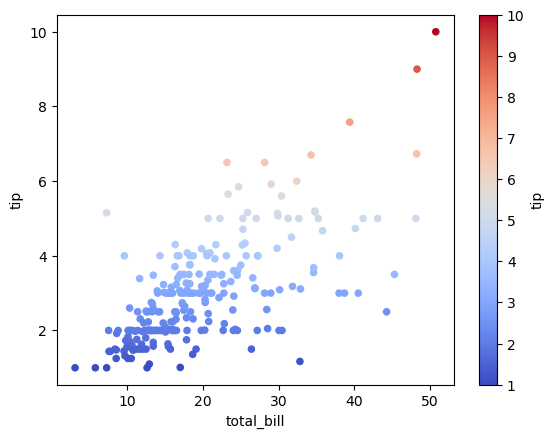

In [53]:
tips_df.plot(x='total_bill', y='tip', kind='scatter', c='tip', cmap='coolwarm')

#### Q5. Frequency of people visiting on weekends

In [65]:
tips_df[tips_df['day'].isin(['Sat', 'Sun'])].value_counts().sum()

163

#### Q6. Analysis of money spend and tips by various family sizes

In [101]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [108]:
res_grouped = tips_df.groupby('size').sum(numeric_only=True)
res_grouped

,total_bill,tip
size,,
1,28.97,5.75
2,2565.89,402.84
3,884.55,128.94
4,1058.70,153.01
5,150.34,20.14
6,139.32,20.90


#### Q7. analysis on the relation of total bill and number of people

In [110]:
res_grouped['total_bill']

size
1      28.97
2    2565.89
3     884.55
4    1058.70
5     150.34
6     139.32
Name: total_bill, dtype: float64

#### Q8. Bill to Tip ratio

In [113]:
total_bill_sum = tips_df['total_bill'].sum()
tip_sum = tips_df['tip'].sum()
ratio = total_bill_sum / tip_sum
ratio

6.599100576833703

#### Q9. which time is more busy for which day?

In [115]:
tips_df['time'].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

In [116]:
tips_df['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [134]:
busy_times = tips_df.groupby(['day', 'time']).size()
busy_times

day   time  
Thur  Lunch     61
      Dinner     1
Fri   Lunch      7
      Dinner    12
Sat   Lunch      0
      Dinner    87
Sun   Lunch      0
      Dinner    76
dtype: int64

#### Q10. which sex has spent more total_bills on weekends

In [158]:
weekend_data = tips_df[tips_df['day'].isin(['Sat', 'Sun'])]
gender_total_bills = tips_df.groupby('sex')['total_bill'].sum(numeric_only=True)
gender_max_total_bill = gender_total_bills.idxmax()
gender_max_total_bill

'Male'

#### Q11. maximum profit - somker or non smoker

In [159]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [163]:
smoker_profit = tips_df.groupby('smoker')['total_bill'].max()
smoker_profit

smoker
Yes    50.81
No     48.33
Name: total_bill, dtype: float64

**Hence, smokers tend to pay more at the restaurant**